In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Dataset\\online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df[["Administrative", "Informational", "ProductRelated"]]

,Administrative,Informational,ProductRelated
0,0,0,1
1,0,0,2
2,0,0,1
3,0,0,2
4,0,0,10
...,...,...,...
12325,3,0,53
12326,0,0,5
12327,0,0,6
12328,4,0,15


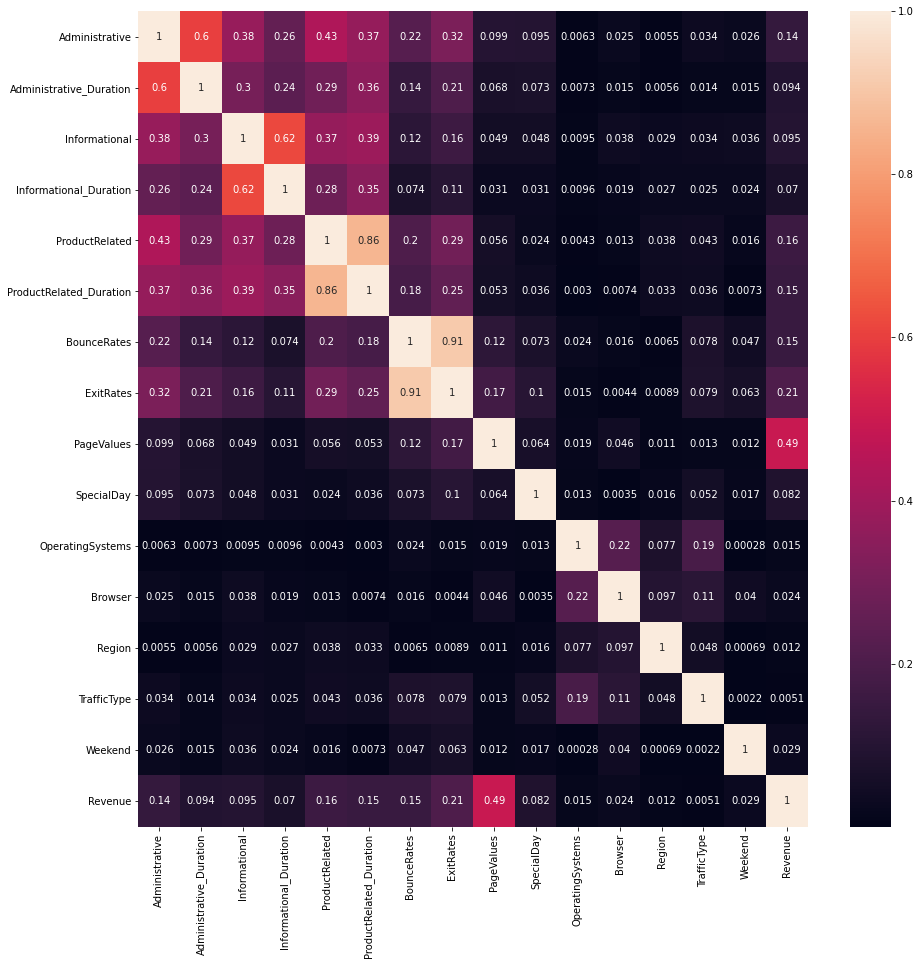

In [6]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(abs(df_corr), annot=True)
plt.show()

In [7]:
def correlation(dataset, threshold):
    corr = dataset.corr()
    multicollinearity = {}
    
    for column in corr.columns:
        for index in corr.index:
            if abs(corr.loc[index, column]) >= threshold:
                multicollinearity[(index, column)] = corr.loc[index, column]
                
    data_corr = pd.DataFrame(data={"Feature_1":[column[0] for column in multicollinearity.keys()],
                                   "Correlation":[value for value in multicollinearity.values()],
                                   "Feature_2":[column[1] for column in multicollinearity.keys()]})
    
    for i in range(data_corr.shape[0]):
        if data_corr.loc[i, "Correlation"] == 1.0:
            data_corr.drop(index=i, inplace=True)
            
    data_corr.drop_duplicates(subset="Correlation", inplace=True)
    
    return data_corr

In [8]:
df["DislikeRates"] = [df.loc[i, "BounceRates"] + df.loc[i, "ExitRates"] for i in range(df.shape[0])]
df["DislikeRates"] = [(df["DislikeRates"][i] * 100) / df["DislikeRates"].max() for i in range(df.shape[0])]


df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,DislikeRates
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,100.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,25.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,100.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,47.5
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,17.5


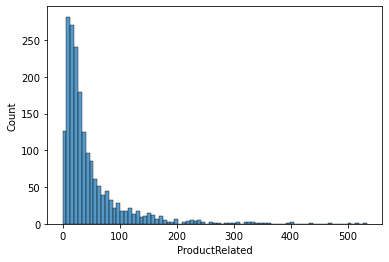

In [9]:
sns.histplot(df[df["Revenue"] == True]["ProductRelated"])

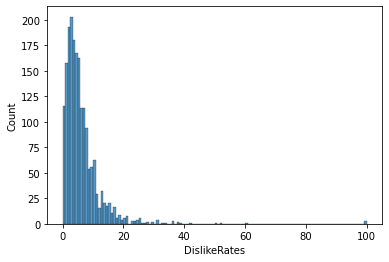

In [10]:
sns.histplot(df[df["Revenue"] == True]["DislikeRates"])

In [11]:
df[(df["Revenue"] == True) & (df["DislikeRates"] > 50)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,DislikeRates
6700,0,0.0,0,0.0,1,0.00,0.200000,0.200000,0.0,0.0,Oct,2,5,1,20,Returning_Visitor,False,True,100.000000
7600,0,0.0,0,0.0,3,0.00,0.200000,0.200000,0.0,0.0,Nov,3,2,1,11,Returning_Visitor,False,True,100.000000
8106,2,256.5,0,0.0,10,117.25,0.110714,0.130952,0.0,0.0,Nov,2,2,7,11,Returning_Visitor,True,True,60.416667
10531,0,0.0,0,0.0,8,335.25,0.100000,0.108333,0.0,0.0,Nov,3,12,1,1,Returning_Visitor,False,True,52.083333
10789,1,0.0,0,0.0,1,0.00,0.200000,0.200000,0.0,0.0,Nov,3,2,3,8,Returning_Visitor,False,True,100.000000


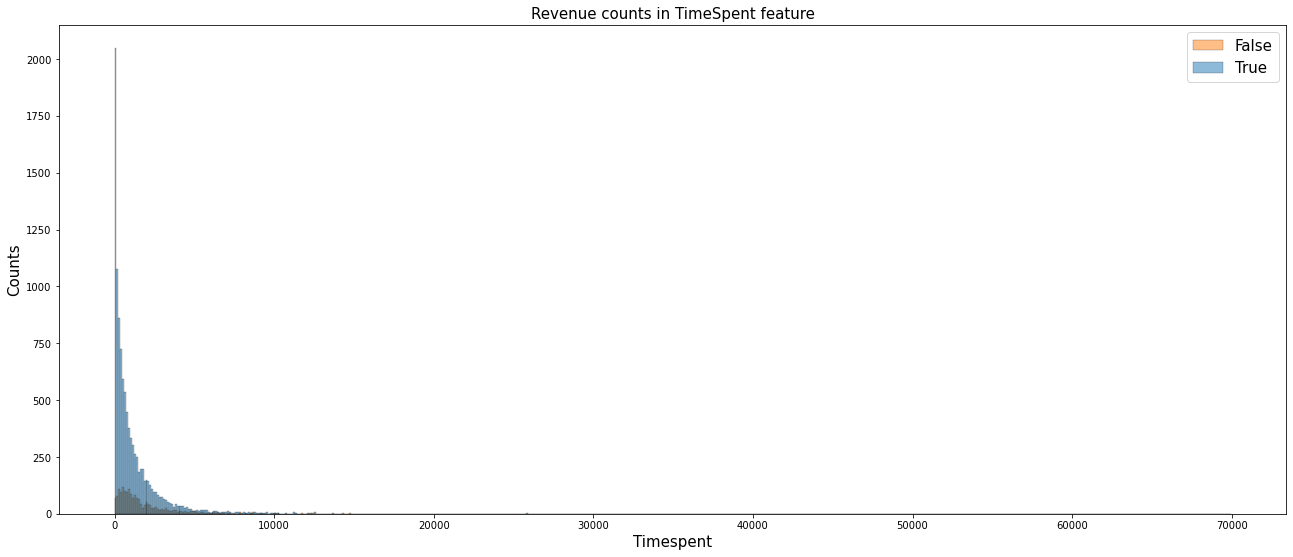

In [12]:
df["TimeSpent"] = df["Administrative_Duration"] + df["Informational_Duration"] + df["ProductRelated_Duration"]

fig, ax = plt.subplots(figsize=(22, 9))

sns.histplot(data=df, x="TimeSpent", hue="Revenue")

plt.xlabel("Timespent", size=15)
plt.ylabel("Counts", size=15)

plt.legend([False, True],loc="upper right", prop={"size":15})
plt.title(f"Revenue counts in TimeSpent feature", size=15)

plt.show()

In [13]:
df["ProductRelated"] = pd.qcut(df["ProductRelated"], 31)

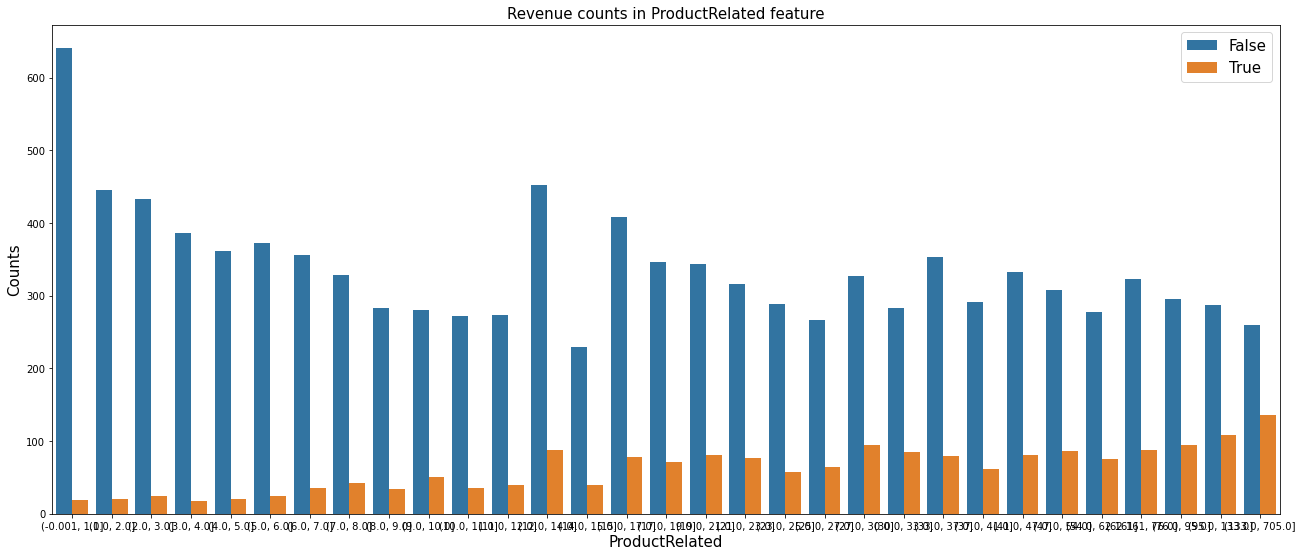

In [14]:
fig, ax = plt.subplots(figsize=(22, 9))

sns.countplot(data=df, x="ProductRelated", hue="Revenue")

plt.xlabel("ProductRelated", size=15)
plt.ylabel("Counts", size=15)

plt.legend([False, True], loc="upper right", prop={"size":15})
plt.title("Revenue counts in ProductRelated feature", size=15)

plt.show()

In [15]:
df["Administrative"] = pd.qcut(df["Administrative"], 2)

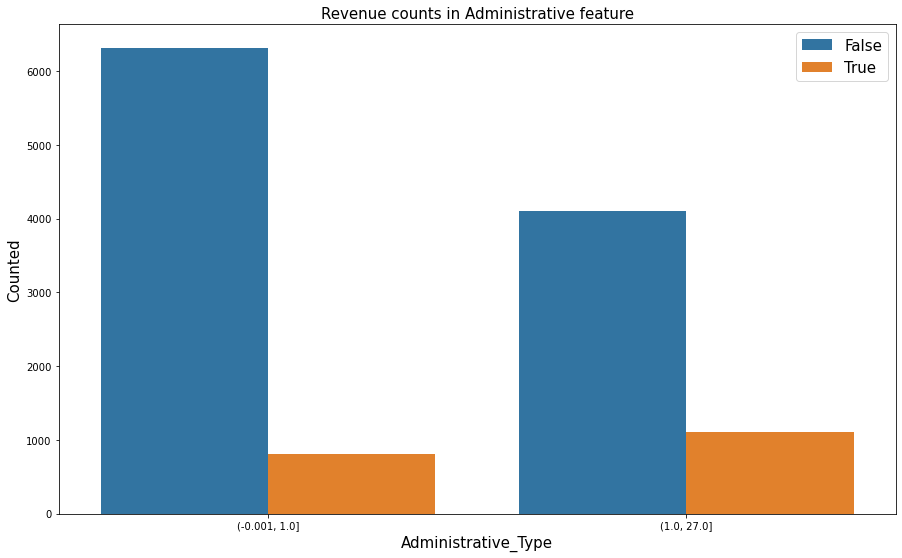

In [16]:
fig, ax = plt.subplots(figsize=(15, 9))

sns.countplot(data=df, x="Administrative", hue="Revenue")

plt.xlabel("Administrative_Type", size=15)
plt.ylabel("Counted", size=15)

plt.legend([False, True], loc="upper right", prop={'size':15})
plt.title("Revenue counts in Administrative feature", size=15)
plt.show()

In [17]:
df["OperatingSystems"] = pd.qcut(df["OperatingSystems"], 2)

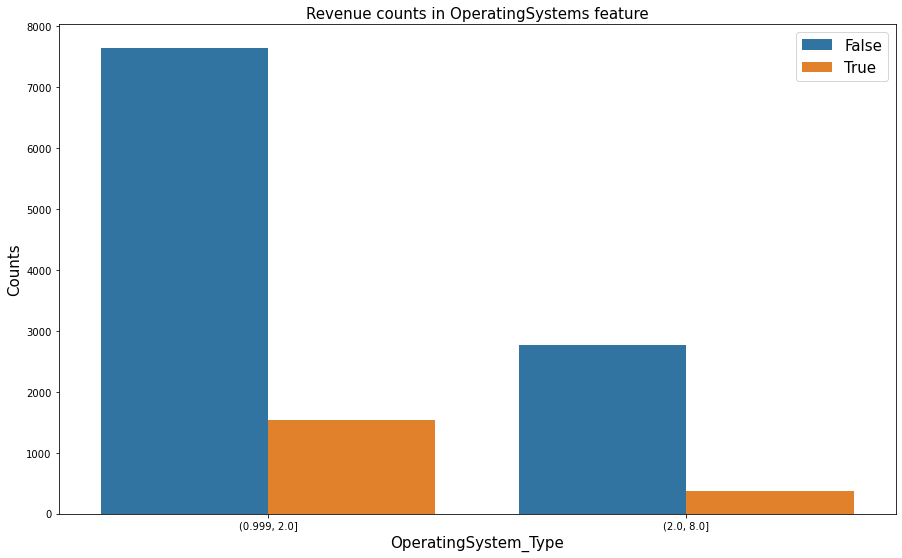

In [18]:
fig, ax = plt.subplots(figsize=(15,9))

sns.countplot(data=df, x="OperatingSystems", hue="Revenue")

plt.xlabel("OperatingSystem_Type", size=15)
plt.ylabel("Counts", size=15)

plt.legend([False, True], loc="upper right", prop={"size":15})
plt.title("Revenue counts in OperatingSystems feature", size=15)
plt.show()

In [19]:
df["Browser"] = pd.qcut(df["Browser"], 2)

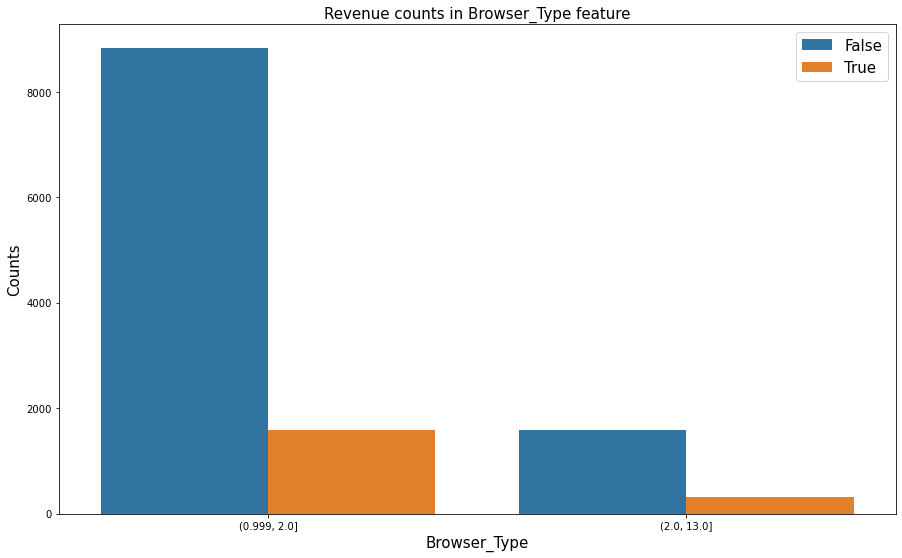

In [20]:
fig, ax = plt.subplots(figsize=(15, 9))

sns.countplot(data=df, x="Browser", hue="Revenue")

plt.xlabel("Browser_Type", size=15)
plt.ylabel("Counts", size=15)

plt.legend([False, True], loc="upper right", prop={'size':15})
plt.title("Revenue counts in Browser_Type feature", size=15)
plt.show()

In [21]:
df["Region"] = pd.qcut(df["Region"], 2)

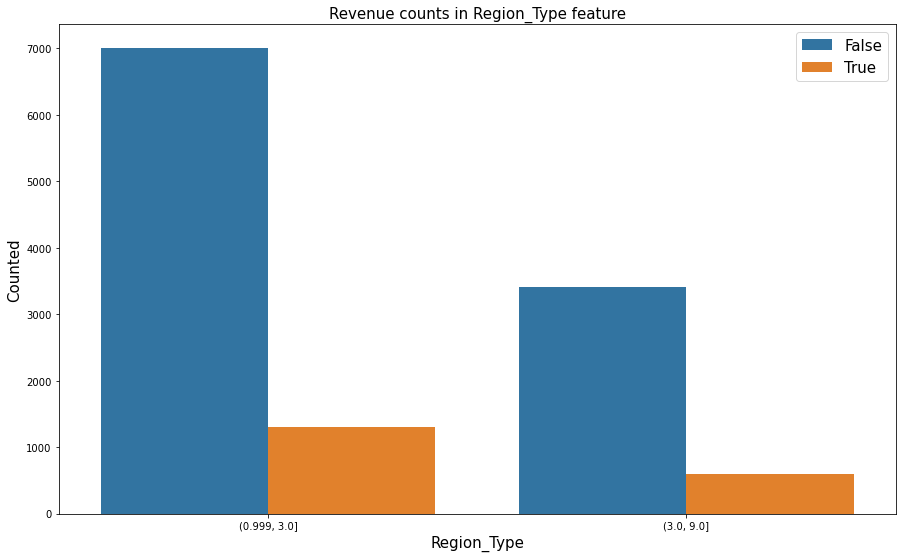

In [22]:
fig, ax = plt.subplots(figsize=(15, 9))

sns.countplot(data=df, x="Region", hue="Revenue")

plt.xlabel("Region_Type", size=15)
plt.ylabel("Counted", size=15)

plt.legend([False, True], loc="upper right", prop={'size':15})
plt.title("Revenue counts in Region_Type feature", size=15)
plt.show()

In [23]:
df["TrafficType"] = pd.qcut(df["TrafficType"], 3)

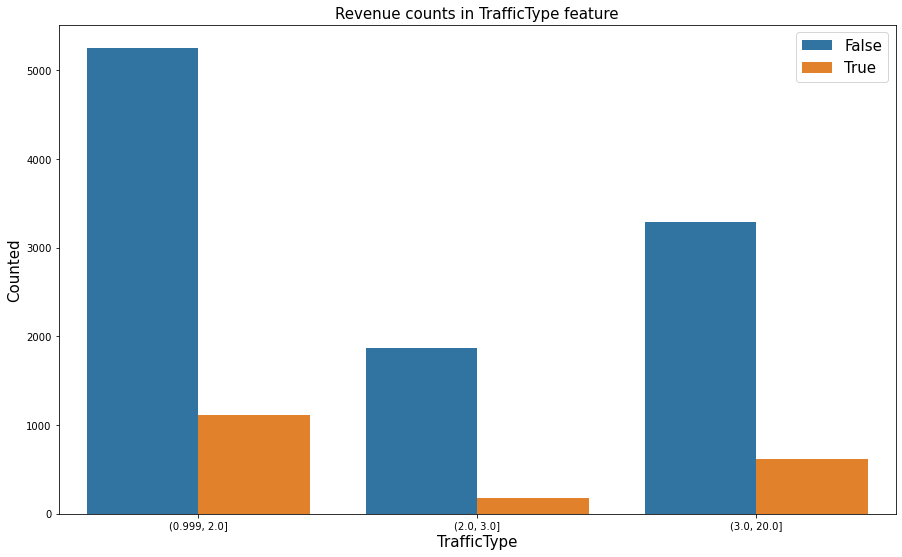

In [24]:
fig, ax = plt.subplots(figsize=(15, 9))

sns.countplot(data=df, x="TrafficType", hue="Revenue")

plt.xlabel("TrafficType", size=15)
plt.ylabel("Counted", size=15)

plt.legend([False, True], loc="upper right", prop={'size':15})
plt.title("Revenue counts in TrafficType feature", size=15)
plt.show()

In [25]:
bins = [-0.001, 2.0, 27.0]

df["Informational"] = pd.cut(df["Informational"], bins)

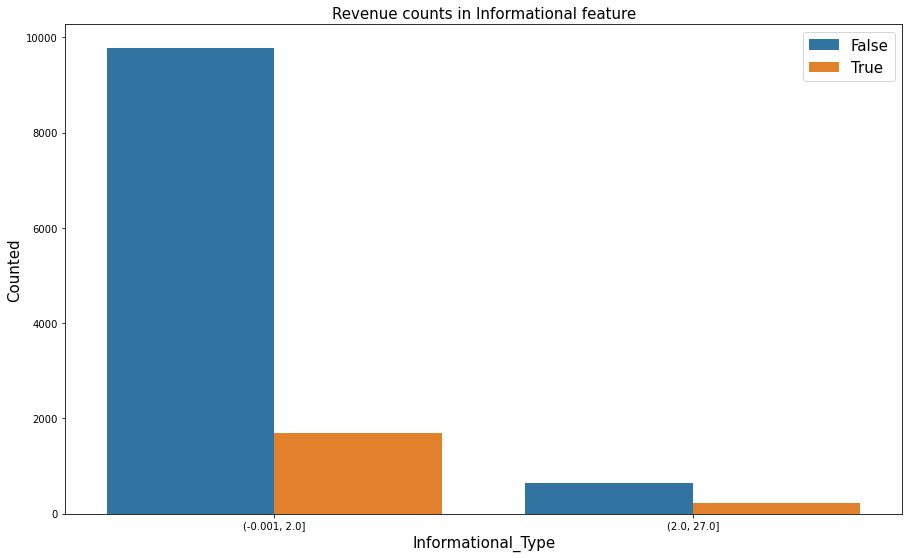

In [26]:
fig, ax = plt.subplots(figsize=(15, 9))

sns.countplot(data=df, x="Informational", hue="Revenue")

plt.xlabel("Informational_Type", size=15)
plt.ylabel("Counted", size=15)

plt.legend([False, True], loc="upper right", prop={'size':15})
plt.title("Revenue counts in Informational feature", size=15)
plt.show()

In [27]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,DislikeRates,TimeSpent
0,"(-0.001, 1.0]",0.0,"(-0.001, 2.0]",0.0,"(-0.001, 1.0]",0.000000,0.20,0.20,0.0,0.0,Feb,"(0.999, 2.0]","(0.999, 2.0]","(0.999, 3.0]","(0.999, 2.0]",Returning_Visitor,False,False,100.0,0.000000
1,"(-0.001, 1.0]",0.0,"(-0.001, 2.0]",0.0,"(1.0, 2.0]",64.000000,0.00,0.10,0.0,0.0,Feb,"(0.999, 2.0]","(0.999, 2.0]","(0.999, 3.0]","(0.999, 2.0]",Returning_Visitor,False,False,25.0,64.000000
2,"(-0.001, 1.0]",0.0,"(-0.001, 2.0]",0.0,"(-0.001, 1.0]",0.000000,0.20,0.20,0.0,0.0,Feb,"(2.0, 8.0]","(0.999, 2.0]","(3.0, 9.0]","(2.0, 3.0]",Returning_Visitor,False,False,100.0,0.000000
3,"(-0.001, 1.0]",0.0,"(-0.001, 2.0]",0.0,"(1.0, 2.0]",2.666667,0.05,0.14,0.0,0.0,Feb,"(2.0, 8.0]","(0.999, 2.0]","(0.999, 3.0]","(3.0, 20.0]",Returning_Visitor,False,False,47.5,2.666667
4,"(-0.001, 1.0]",0.0,"(-0.001, 2.0]",0.0,"(9.0, 10.0]",627.500000,0.02,0.05,0.0,0.0,Feb,"(2.0, 8.0]","(2.0, 13.0]","(0.999, 3.0]","(3.0, 20.0]",Returning_Visitor,True,False,17.5,627.500000


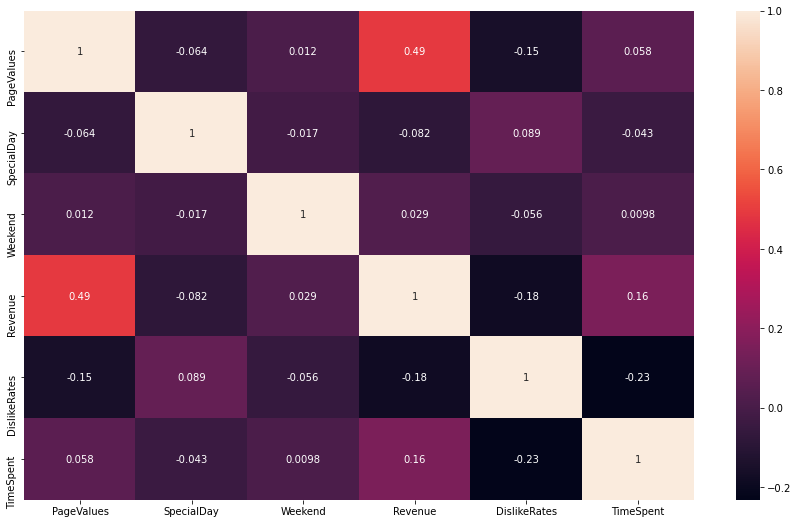

In [28]:
fig, ax = plt.subplots(figsize=(15, 9))

new_df = df.drop(columns=["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration",
                  "BounceRates", "ExitRates"])

sns.heatmap(new_df.corr(), annot=True)

In [29]:
# df.to_csv("Dataset\\Engineered\\online_shoppers_intention_2.csv", index=False)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  category
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  category
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  category
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  object  
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi